# Visualización de errores

En cualquier medición científica, la contabilización exacta de los errores es casi tan importante, si no más, que la comunicación exacta de la cifra en sí.
Por ejemplo, imaginemos que utilizo algunas observaciones astrofísicas para calcular la constante de Hubble, la medida local de la velocidad de expansión del Universo.
Sé que la literatura actual sugiere un valor de alrededor de 71 (km/s)/Mpc, y yo mido un valor de 74 (km/s)/Mpc con mi método. ¿Son coherentes los valores? no hay forma de saberlo.

Supongamos que aumento esta información con las incertidumbres reportadas: la literatura actual sugiere un valor de alrededor de 71 $\pm$ 2,5 (km/s)/Mpc, y mi método ha medido un valor de 74 $\pm$ 5 (km/s)/Mpc. Ahora bien, ¿son coherentes los valores? Es una pregunta que puede responderse cuantitativamente.

En la visualización de datos y resultados, mostrar estos errores de forma efectiva puede hacer que un gráfico transmita una información mucho más completa.

https://www.data-to-viz.com: para ver los diferentes tipos de gráficos segun el tipo de datos

## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

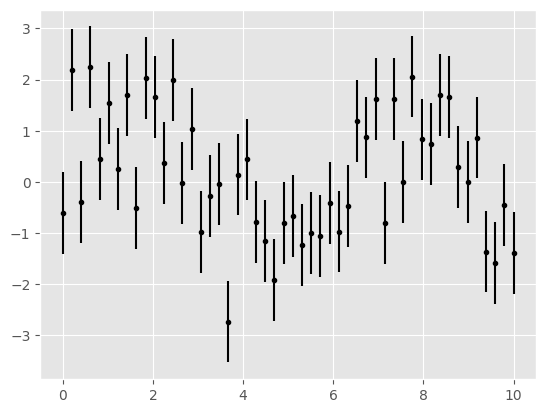

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)      

plt.errorbar(x, y, yerr=dy, fmt='.k');

Aquí ``fmt`` es un código de formato que controla la apariencia de líneas y puntos, y tiene la misma sintaxis que la abreviatura usada en ``plt.plot``.

Además de estas opciones básicas, la función ``errorbar`` tiene muchas opciones para ajustar los resultados.
Usando estas opciones adicionales puede personalizar fácilmente la estética de su gráfico de barras de error.

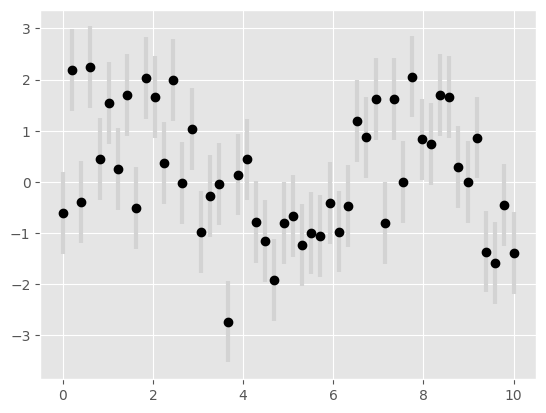

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

Además de estas opciones, también puede especificar barras de error horizontales (``xerr``), barras de error unilaterales y muchas otras variantes.

## Errores continuos

En algunas situaciones es deseable mostrar barras de error en cantidades continuas.
Aunque Matplotlib no tiene una rutina incorporada para este tipo de aplicación, es relativamente fácil combinar primitivas como ``plt.plot`` y ``plt.fill_between`` para obtener un resultado útil.

Aquí realizaremos una simple *regresión de un proceso ``Gaussiano``*, utilizando la API de Scikit-Learn.
Se trata de un método de ajuste de una función ``no paramétrica`` muy flexible a los datos con una medida continua de la incertidumbre.

No vamos a profundizar en los detalles de la regresión del proceso de Gauss en este punto, sino que nos centraremos en cómo se puede visualizar una medida de error continua:

In [4]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Define el modelo y genera algunos datos
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Define el kernel (cambiamos la correlación cúbica por un RBF, que es comúnmente usado)
kernel = RBF(length_scale=1.0)

# Crea el modelo GaussianProcessRegressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

# Ajusta el modelo a los datos
gp.fit(xdata[:, np.newaxis], ydata)

# Predicciones
xfit = np.linspace(0, 10, 1000)
yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * sigma  # 2*sigma ~ 95% región de confianza


Ahora tenemos ``xfit``, ``yfit``, y ``dyfit``, que muestran el ajuste continuo a nuestros datos.
Podríamos pasarlas a la función ``plt.errorbar``, pero en realidad no queremos trazar 1.000 puntos con 1.000 barras de error.
En su lugar, podemos utilizar la función ``plt.fill_between`` con un color claro para visualizar este error continuo:

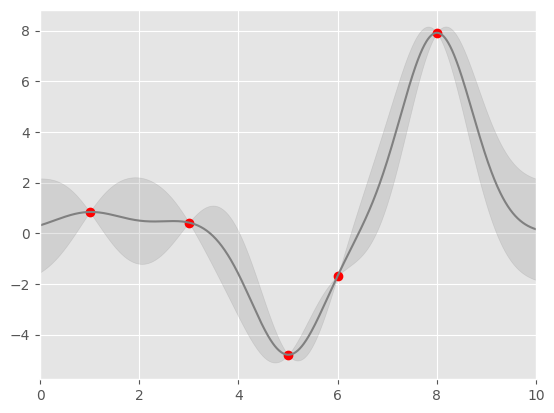

In [9]:
# Visualizar el resultado
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Fíjate en lo que hemos hecho aquí con la función ``fill_between``: pasamos un valor x, luego el límite superior e inferior, y el resultado es que se rellena el área entre estas regiones.

La figura resultante ofrece una visión muy intuitiva de lo que está haciendo el algoritmo de regresión del proceso de Gauss: en las regiones cercanas a un punto de datos medido, el modelo está fuertemente restringido y esto se refleja en los pequeños errores del modelo.
En las regiones alejadas de un punto de datos medidos, el modelo no está fuertemente restringido, y los errores del modelo aumentan.

<!--NAVIGATION-->
< [Gráficos de dispersión simples](2-Scatter_Plots.ipynb) | [Gráficos de densidad y contorno](4-Density_y_Contour_Plots.ipynb) >
